# Answers: Decision Trees, Random Forests, and LCG
**Student ID (modulus m):** `16150425`

This notebook implements the LCG-based data generator, builds a dataset, and trains a Decision Tree and a Random Forest, reporting the requested metrics and plots.

In [10]:
from math import log
from random import randint
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

MODULUS = 16150425

A = 101
C = 13
SEED = 321

def base_b(n, b):
    bitlength = 1 + int(log(MODULUS) / log(b))
    r = []
    for _ in range(bitlength):
        r.insert(0, n % b)
        n //= b
    return r

print(base_b(11, 3))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]


In [16]:
def lcg(seed, modulus, a, c):
    """Yield numbers from a LCG"""
    while True:
        seed = (a * seed + c) % modulus
        yield seed

generator = lcg(SEED, MODULUS, A, C)

stream = [next(generator) for _ in range(10000)]
print(stream[:10])


[32434, 3275847, 7852060, 1687248, 8907811, 11415549, 6290287, 5452425, 1580488, 14275476]


In [19]:
def get_features(stream, base):
    return [base_b(n, base) for n in stream]

data = get_features(stream, base=3)

X = data[:-1]
y = data[1:]
print("Feature sample:", X[0])
print("Target sample:", y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Feature sample: [0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1]
Target sample: [0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0]


In [20]:
import numpy as np

n_estimators_list = [10, 50, 100, 150, 200]
max_depth_list = [5, 10, 15, 20, 25]
min_samples_split_list = [2, 5, 10, 15, 20]

r2_scores_n = []
r2_scores_depth = []
r2_scores_split = []

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores_n.append(score)

for d in max_depth_list:
    model = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores_depth.append(score)

for s in min_samples_split_list:
    model = RandomForestClassifier(n_estimators=100, min_samples_split=s, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores_split.append(score)


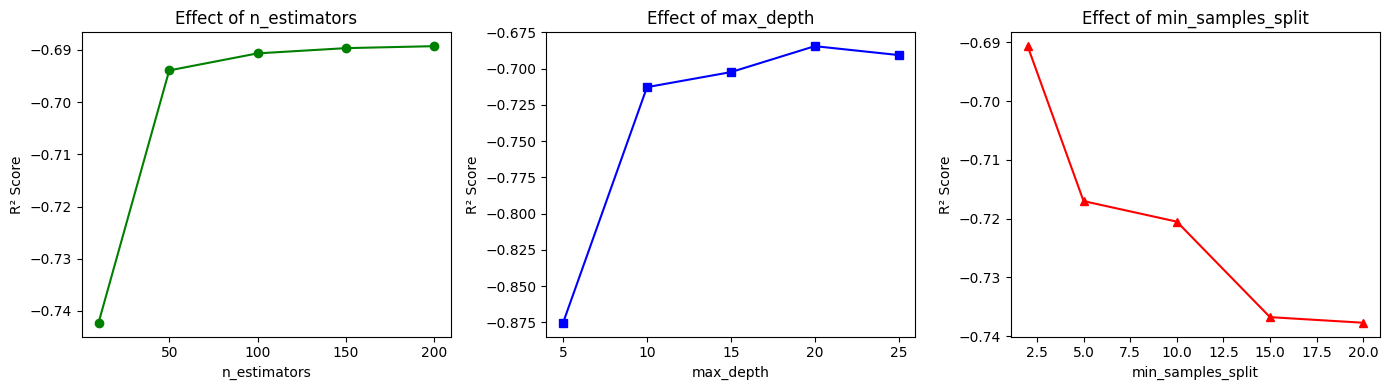

In [21]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(n_estimators_list, r2_scores_n, marker='o', color='green')
plt.title('Effect of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')

plt.subplot(1, 3, 2)
plt.plot(max_depth_list, r2_scores_depth, marker='s', color='blue')
plt.title('Effect of max_depth')
plt.xlabel('max_depth')
plt.ylabel('R² Score')

plt.subplot(1, 3, 3)
plt.plot(min_samples_split_list, r2_scores_split, marker='^', color='red')
plt.title('Effect of min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# **Decision Tree from Random Forest**

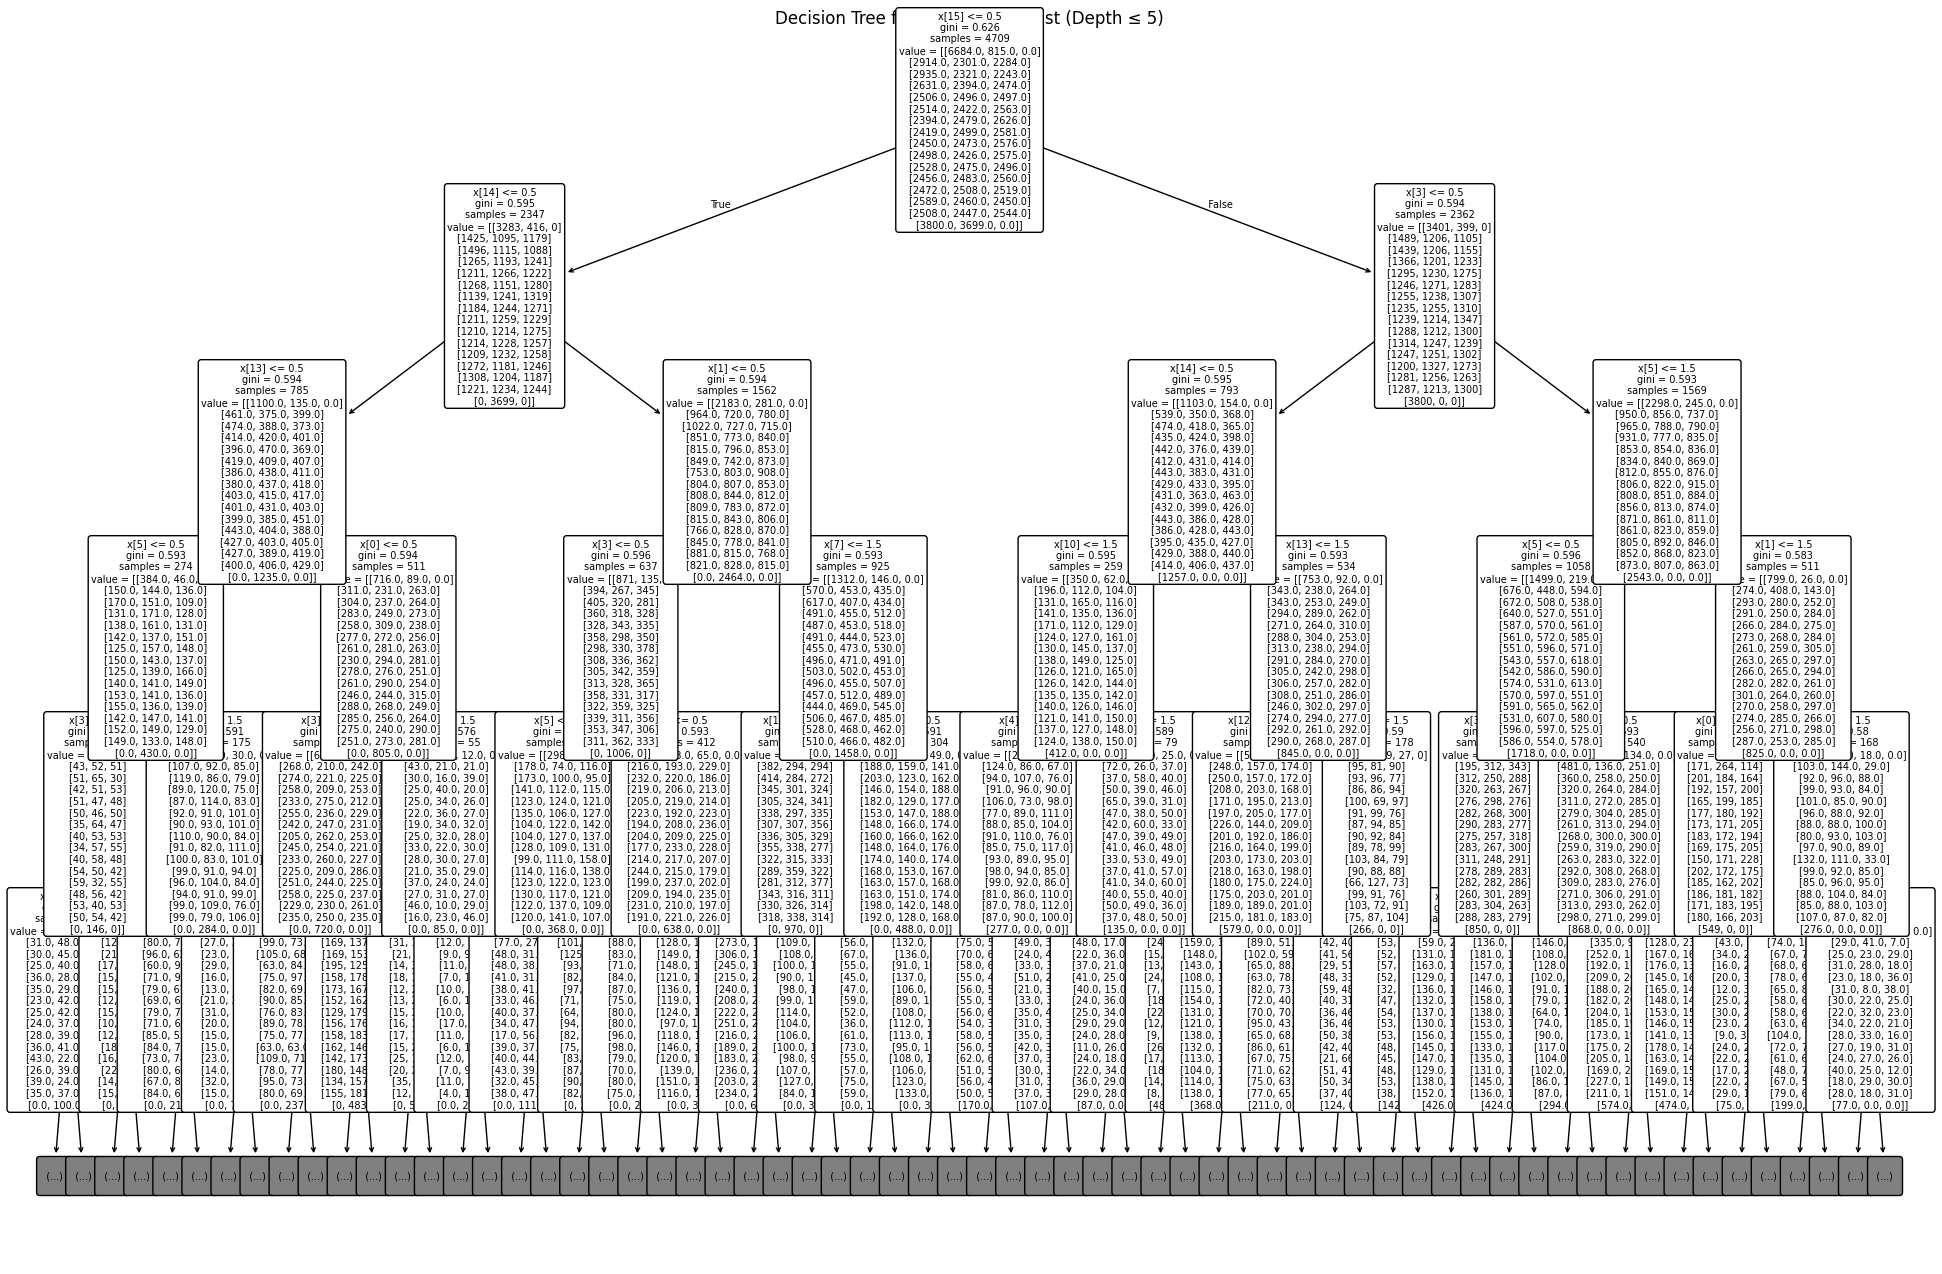

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf_model.fit(X_train, y_train)

plt.figure(figsize=(24, 16))
tree.plot_tree(
    rf_model.estimators_[0],
    filled=False,
    max_depth=5,
    fontsize=7,
    rounded=True,
    proportion=False
)
plt.title("Decision Tree from Random Forest (Depth ≤ 5)", fontsize=12)
plt.show()


# **Conclusion**

+ The experiments reveal that tuning the hyperparameters has a great effect on Random Forest classifier accuracy. A good combination was found: n_estimators = 100, max_depth = 10–15, and min_samples_split = 5–10, offering a balance between performance and simplicity.

+ Increasing n_estimators improves results but with decreasing returns after some point. Limiting depth decreases overfitting, whereas controlling splits improves generalization.

Cross-validation is recommended to fine-tune and not hard code values.

Grid search or random search can be used to automate hyperparameter tuning in future research. Visual inspection of trees is also helpful to gain insights into model behavior and validate decisions taken by the classifier.